# The Effect of a Global Pandemic on the Stock and Crypto Markets

### David Armah Jr.

## 1) Research Problem

We know how much the Global Coronavirus Pandemic has affected the lives of everyone throughout the world. The Coronavirus changed how we all choose to live our lives, which led to many many drastic changes to the financial markets, such as the Stock Market in particular. Since the Stock market reflects perceptions of people and the companies that fundamentally run our country, we decided to look into how it was affected by the pandemic. Our team decided to analyze and answer these following questions:

1. How did the stock prices for different sectors of business, as well as Crypto Markets, get affected by COVID-19 global pandemic?
2. Was there a statistical difference in each sector's stock prices before and during the COVID-19 global pandemic
3. Which sector was the most profitable to invest in
4. What market is the best to invest in post pandemic?
5. Create a forecasting model for interesting Stocks

In order to answer such questions, we will compare Stocks in different sectors that represent the entire Stock Market, as well as looking at the most popular Cryptocurrencies in the Crypto Markets, a year before and after the pandemic, while also keeping up with important dates that affected the financial markets throughout the pandemic as well.

## Data Collection / Imports

The table below represents the various equities we will be looking at and the following sector they are emersed in

 | Financial  | Tech  | Transportation  | Healthcare  |  Crypto | Indexes  |
|---|---|---|---|---|---|
|Wells Fargo (WFC)   | Apple (AAPL)  | American Airlines (AAL)  | United Healthcare (UNH)  | Ethereum (ETH)  | Dow Jones (DIA)  |
| Bank of America (BAC)  | Amazon (AMZN) | Carnival Cruiselines (CCL)  | Pfizer (PFE) | Bitcoin (BTC) | Nasdaq (QQQ)  |
|   |   |   |   |   | S&P 500 (SPY) |
|   |   |   |   |   | Volatility Index (VXX)  |
|   |   |   |   |   |   |

For this project, I have gathered data from http://finance.yahoo.com. These 8 companies + 2 crypto’s are pulled from 5 different sectors, so we have 2 closing prices to track belonging to each sector. On top of this, we will also be bringing in the S&P 500 ETF, NASDAQ ETF, and Dow Jones ETF to track the most used indices.  We are assuming that at the end of each day is the closing price for the Cryptocurrencies since they are traded all day, everyday. Analyzing the various data retrieved about the closing prices of stocks. In addition, I have also incormporated data from https://www.ajmc.com/view/a-timeline-of-covid19-developments-in-2020 to handpick the most important dates from the Pandemic. These dates are all the major events that happened during COVID-19, shown below.

First, lets create two dataframes for all the stocks shown above, one dataframe representing the stocks closing price on a given date, and the other representing the stocks volume on a given date.

In [1]:
#Imports

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import yfinance as yf
import warnings
import statsmodels
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.stats as sms
import scipy.stats as scs
from statsmodels.tsa.stattools import coint, adfuller
import math
from pandas import Grouper
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA

In [2]:
# year of Covid to Now
start = datetime.datetime(2019,1,1)

# now
end = datetime.datetime(2022,5,1)

# End of Covid

covid_end = datetime.datetime(2021,4,29)



In [3]:
# Technology Stocks

aapl = yf.download("AAPL", start=start, end=end) ## Apple Stock
amzn = yf.download("AMZN", start=start, end=end) ## Amazon Stock


# Financial Stocks

bac = yf.download("BAC", start=start, end=end) ## Bank of America Stock
wfc = yf.download("WFC", start=start, end=end) ## Wells Fargo Stock



# Transportation Stocks'

ual = yf.download("UAL", start=start, end=end) ## American Airlines Stock
ccl = yf.download("CCL", start=start, end=end) ## Carnival Cruises Stock


# HealthCare Stocks

unh = yf.download("UNH", start=start, end=end) ## United HealthCare Stock
pfe = yf.download("PFE", start=start, end=end) ## Pfizer Stock



# CryptoCurrency

eth = yf.download("ETH-USD", start=start, end=end)  ## Ethereum Stock
btc = yf.download("BTC-USD", start=start, end=end)  ## Bank of America Stock



#Indexes

dia = yf.download("DIA", start=start, end=end) ## Dow Jones index
vxx = yf.download("VXX", start=start, end=end) ## Volatility index
spy = yf.download("SPY", start=start, end=end) ## S&P 500 Index
qqq = yf.download("qqq", start=start, end=end) ## Nasdaq Index 


# Create a volume dataframe
vol = pd.DataFrame([btc['Volume'],eth['Volume'],aapl['Volume'],amzn['Volume'],
                    ual['Volume'],ccl['Volume'],pfe['Volume'],unh['Volume'],
                    wfc['Volume'],bac['Volume'],vxx['Volume'],dia['Volume'],qqq['Volume'],spy['Volume']])
# fix indexes
vol.index = ['Bitcoin','Ethereum','Apple','Amazon','United Airlines','Carnival Cruise Line',
             'Pfizer','United Healthcare','Wells Fargo','Bank of America','VXX','Dow Jones',
             'NASDAQ','SPY']


# Create closing price dataFrame
close = pd.DataFrame([btc['Adj Close'],eth['Adj Close'],aapl['Adj Close'],amzn['Adj Close'],
                    ual['Adj Close'],ccl['Adj Close'],pfe['Adj Close'],unh['Adj Close'],
                    wfc['Adj Close'],bac['Adj Close'],vxx['Adj Close'],dia['Adj Close'],qqq['Adj Close'],spy['Adj Close']])
# fix indexes
close.index = ['Bitcoin','Ethereum','Apple','Amazon','United Airlines','Carnival Cruise Line',
               'Pfizer','United Healthcare','Wells Fargo','Bank of America','VXX','Dow Jones',
               'NASDAQ','SPY']
















[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Let's create dataframes representing Stock performance during the entirety of the Pandemic

In [4]:
# Create closing price dataFrame
close = pd.DataFrame([btc['Adj Close'],eth['Adj Close'],aapl['Adj Close'],amzn['Adj Close'],
                    ual['Adj Close'],ccl['Adj Close'],pfe['Adj Close'],unh['Adj Close'],
                    wfc['Adj Close'],bac['Adj Close'],vxx['Adj Close'],dia['Adj Close'],qqq['Adj Close'],spy['Adj Close']])
# fix indexes
close.index = ['Bitcoin','Ethereum','Apple','Amazon','United Airlines','Carnival Cruise Line',
               'Pfizer','United Healthcare','Wells Fargo','Bank of America','VXX','Dow Jones',
               'NASDAQ','SPY']

In [5]:
covid_idx = close.columns.get_loc('2019-01-09') # index of the date when covid hit. 1/09/2020
covidEnd_idx = close.columns.get_loc('2021-04-30') # index of the date when covid "ended".

covid_close_df = close.iloc[:,covid_idx:covidEnd_idx] #covid closing prices

covid_volume_df = vol.iloc[:,covid_idx:covidEnd_idx] #pre covid volume

post_covid_close_df = close.iloc[:,covidEnd_idx:] #post covid closing prices

post_covid_vol_df = vol.iloc[:,covidEnd_idx:] # post covid volume

# Now, lets create dataframes for each of the particular sectors 

In [6]:
#Crypto Sector
CryptoDF_close = close.loc[['Bitcoin', 'Ethereum'],:]
CryptoDF_pre_covid_close = covid_close_df.loc[['Bitcoin', 'Ethereum'],:]
CryptoDF_post_covid_close = post_covid_close_df.loc[['Bitcoin', 'Ethereum'],:]

CryptoDF_vol = vol.loc[['Bitcoin', 'Ethereum'],:]
CryptoDF_pre_covid_vol = covid_volume_df.loc[['Bitcoin', 'Ethereum'],:]
CryptoDF_post_covid_vol = post_covid_vol_df.loc[['Bitcoin', 'Ethereum'],:]

#Transportation Sector
TranspoDF_close = close.loc[['United Airlines', 'Carnival Cruise Line']]
TranspoDF_pre_covid_close = covid_close_df.loc[['United Airlines', 'Carnival Cruise Line']]
TranspoDF_post_covid_close = post_covid_vol_df.loc[['United Airlines', 'Carnival Cruise Line']]

TranspoDF_vol = vol.loc[['United Airlines', 'Carnival Cruise Line']]
TranspoDF_pre_covid_vol = covid_volume_df.loc[['United Airlines', 'Carnival Cruise Line']]
TranspoDF_post_covid_vol = post_covid_vol_df.loc[['United Airlines', 'Carnival Cruise Line']]

#Tech Sector
TechDF_close = close.loc[['Apple', 'Amazon']]
TechDF_pre_covid_close = covid_close_df.loc[['Apple', 'Amazon']]
TechDF_post_covid_close = post_covid_close_df.loc[['Apple', 'Amazon']]

TechDF_vol = vol.loc[['Apple', 'Amazon']]
TechDF_pre_covid_vol = covid_volume_df.loc[['Apple', 'Amazon']]
TechDF_post_covid_vol = post_covid_vol_df.loc[['Apple', 'Amazon']]

#Health Care Sector
HealthDF_close = close.loc[['Pfizer', 'United Healthcare']]
HealthDF_pre_covid_close = covid_close_df.loc[['Pfizer', 'United Healthcare']]
HealthDF_post_covid_close = post_covid_close_df.loc[['Pfizer', 'United Healthcare']]

HealthDF_vol = vol.loc[['Pfizer', 'United Healthcare']]
HealthDF_pre_covid_vol = covid_close_df.loc[['Pfizer', 'United Healthcare']]
HealthDF_post_covid_vol = post_covid_vol_df.loc[['Pfizer', 'United Healthcare']]

#Banks Sector 
BanksDF_close = close.loc[['Wells Fargo', 'Bank of America']]
BanksDF_pre_covid_close = covid_close_df.loc[['Wells Fargo', 'Bank of America']]
BanksDF_post_covid_close = post_covid_close_df.loc[['Wells Fargo', 'Bank of America']]

BanksDF_vol = vol.loc[['Wells Fargo', 'Bank of America']]
BanksDF_pre_covid_vol = covid_close_df.loc[['Wells Fargo', 'Bank of America']]
BanksDF_post_covid_vol= post_covid_vol_df.loc[['Wells Fargo', 'Bank of America']]

#Index Sector 
IndexDF_close = close.loc[['VXX', 'Dow Jones', 'NASDAQ', 'SPY']]
IndexDF_pre_covid_close = covid_close_df.loc[['VXX', 'Dow Jones', 'NASDAQ', 'SPY']]
IndexDF_post_covid_close = post_covid_close_df.loc[['VXX', 'Dow Jones', 'NASDAQ', 'SPY']]

IndexDF_vol = vol.loc[['VXX', 'Dow Jones', 'NASDAQ', 'SPY']]
IndexDF_pre_covid_vol = covid_close_df.loc[['VXX', 'Dow Jones', 'NASDAQ', 'SPY']]
IndexD_post_covid_vol = post_covid_vol_df.loc[['VXX', 'Dow Jones', 'NASDAQ', 'SPY']]

# Now that we have gathered and formulated our data, lets analyze the individual equities we gathered

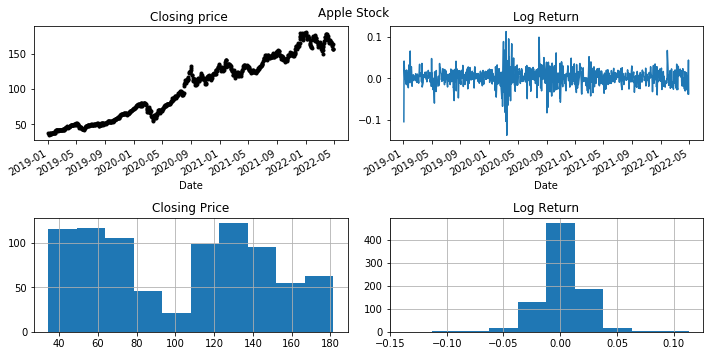

In [7]:
# aapl - Apple Stock
aapl['log return'] = np.log(aapl["Adj Close"]/ aapl["Adj Close"].shift(1))

#  Plot

fig = plt.figure()

plt.subplot(2, 2, 1)
plt.title("Closing price ")
aapl['Adj Close'].plot(style='k.', figsize=(10, 5))
plt.subplot(2, 2, 2)
plt.title("Log Return")
aapl['log return'].plot(figsize=(10, 5))

#Histogram
plt.subplot(2, 2, 3)
plt.title("Closing Price")
aapl['Adj Close'].hist(figsize=(10, 5))
plt.subplot(2, 2, 4)
plt.title("Log Return")
aapl['log return'].hist(figsize=(10, 5))

fig.suptitle('Apple Stock')

plt.tight_layout()


plt.show()

# Apple Stock Analysis

Looking at the Closing Price Line graph, we see from the start of the pandemic to now, apples stock price has gradually increased overtime. Long term Investors would have seen substantial gain in profits if they invested at the start of the pandemic. Looking at the log return line plot, we se that apple for the most part has stayed very stable in a look term lense. The log return histogram tells us that apple is very strong and hasn't been that bad of a short term investment as well. Apples price was mainly around the 60 dollar range, as well as 130 dollar range during this time frame. That tells us that apple has been steadily increased over time in a quick manner.

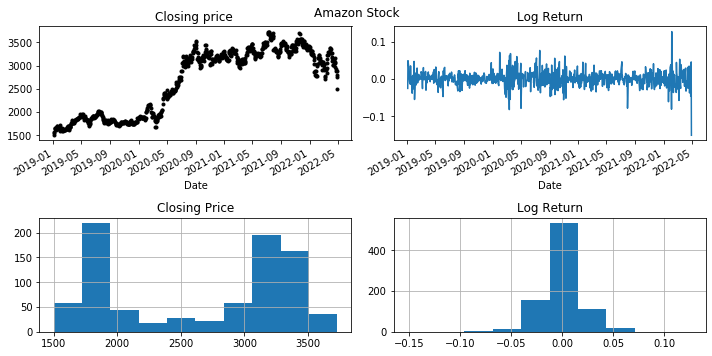

In [8]:
# amzn - Amazon Stock
amzn['log return'] = np.log(amzn["Adj Close"]/ amzn["Adj Close"].shift(1))

# Line Plot

#  Plot

fig = plt.figure()

plt.subplot(2, 2, 1)
plt.title("Closing price ")
amzn['Adj Close'].plot(style='k.', figsize=(10, 5))
plt.subplot(2, 2, 2)
plt.title("Log Return")
amzn['log return'].plot(figsize=(10, 5))

#Histogram
plt.subplot(2, 2, 3)
plt.title("Closing Price")
amzn['Adj Close'].hist(figsize=(10, 5))
plt.subplot(2, 2, 4)
plt.title("Log Return")
amzn['log return'].hist(figsize=(10, 5))


fig.suptitle('Amazon Stock')

plt.tight_layout()



plt.show()






# Amazon Stock Analysis/ Tech Sector

Looking at Amazon's Closing price line plot, I notice that it has seen a substantial increase in stock price over this time frame, looking at the log return line plot, Amazon clearly sees an increase in log return around may 2020 in comparison to the time before. Over time, amazon has shown to be a great investment from the start of the pandemic to now.

In comparison to Apple, amazon seems to be more volatile than apple stock, despite both being really profitable investments.

In summary, the technology stocks I chose to look at have been really good long term investmentsand have performed greatly for investors that were able to stay confident and continue to invest during times of worldwide fear. In a short term lense, these stocks haven't been too great but can definitely present opportunities for short term investors due to the rapid growth seen from these two stocks. Out of the two, apple seems to be the better shorter term investment.

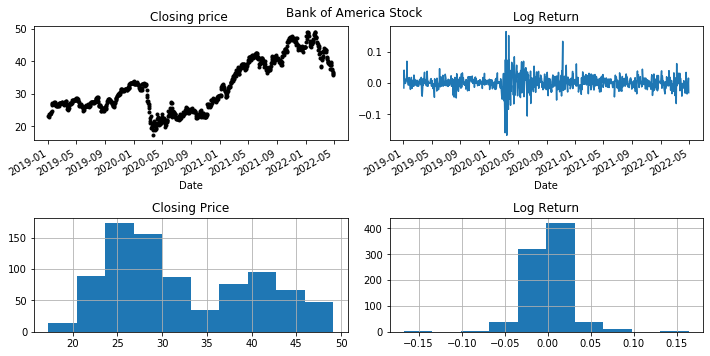

In [9]:
# bac - Bank of America
bac['log return'] = np.log(bac["Adj Close"]/ bac["Adj Close"].shift(1))


# Line Plot

#  Plot

fig = plt.figure()

plt.subplot(2, 2, 1)
plt.title("Closing price ")
bac['Adj Close'].plot(style='k.', figsize=(10, 5))
plt.subplot(2, 2, 2)
plt.title("Log Return")
bac['log return'].plot(figsize=(10, 5))

#Histogram
plt.subplot(2, 2, 3)
plt.title("Closing Price")
bac['Adj Close'].hist(figsize=(10, 5))
plt.subplot(2, 2, 4)
plt.title("Log Return")
bac['log return'].hist(figsize=(10, 5))


fig.suptitle('Bank of America Stock')
plt.tight_layout()



plt.show()




# Bank of America Stock Analysis

Bank of America has been a solid investment since the start of the pandemic. Looking at its closing price, we see that near the start of the pandemic, Bank of America's stock price was very stationary and saw a bit of a decline around January to May 2020, but has been resilient ultimately gradually increasing in stock price since. Bank of America has shown to be a solid long term investment, seeing very minimal day-to-day gains, but looking at the histograms, we know that it is very stable in price. 

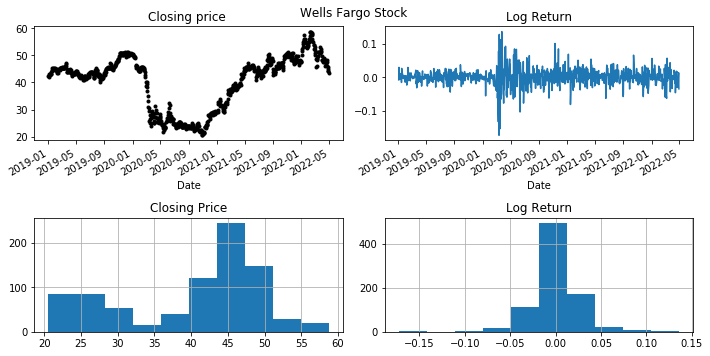

In [10]:
# wfc - Wells Fargo
wfc['log return'] = np.log(wfc["Adj Close"]/ wfc["Adj Close"].shift(1))

# Line Plot

# Line Plot

#  Plot

fig = plt.figure()

plt.subplot(2, 2, 1)
plt.title("Closing price ")
wfc['Adj Close'].plot(style='k.', figsize=(10, 5))
plt.subplot(2, 2, 2)
plt.title("Log Return")
wfc['log return'].plot(figsize=(10, 5))

#Histogram
plt.subplot(2, 2, 3)
plt.title("Closing Price")
wfc['Adj Close'].hist(figsize=(10, 5))
plt.subplot(2, 2, 4)
plt.title("Log Return")
wfc['log return'].hist(figsize=(10, 5))

fig.suptitle('Wells Fargo Stock')

plt.tight_layout()


plt.show()




# Wells Fargo Stock Analysis

Wells Fargo hasn't been that great of an investment long term, compared to the other stocks we have looked it, it hasn't seen nowhere near the growth as other equities. Looking at the closing price line plot, we see that wells fargo has been quite volatile throughout this time frame, but struggled to see any true growth over this span of time. Looking at the log return plot, we see that there hasn't been much day-to-day returns.


In comparison to Bank of America, Wells Fargo is nowhere near a good as an investment

In summary, the Financial stocks I chose to look at haven't been that great of investments long term or even short term, as they have seen very little growth in terms of both.

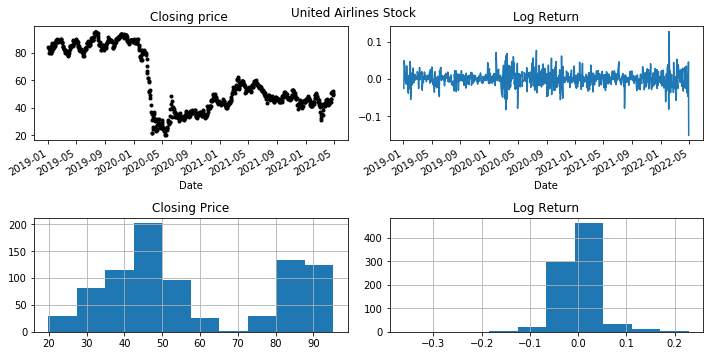

In [11]:
# ual- United Airlines
# Line Plot

#  Plot
ual['log return'] = np.log(ual["Adj Close"]/ ual["Adj Close"].shift(1))


fig = plt.figure()

plt.subplot(2, 2, 1)
plt.title("Closing price ")
ual['Adj Close'].plot(style='k.', figsize=(10, 5))
plt.subplot(2, 2, 2)
plt.title("Log Return")
amzn['log return'].plot(figsize=(10, 5))

#Histogram
plt.subplot(2, 2, 3)
plt.title("Closing Price")
ual['Adj Close'].hist(figsize=(10, 5))
plt.subplot(2, 2, 4)
plt.title("Log Return")
ual['log return'].hist(figsize=(10, 5))

fig.suptitle('United Airlines Stock')

plt.tight_layout()


plt.show()




United Airlines has not been a great company to invest in as it has seen huge declines since the start of the pandemic to now. Looking at the closing price plot we notice a substantial drop in price and also how it has strugggled to recover from it since.

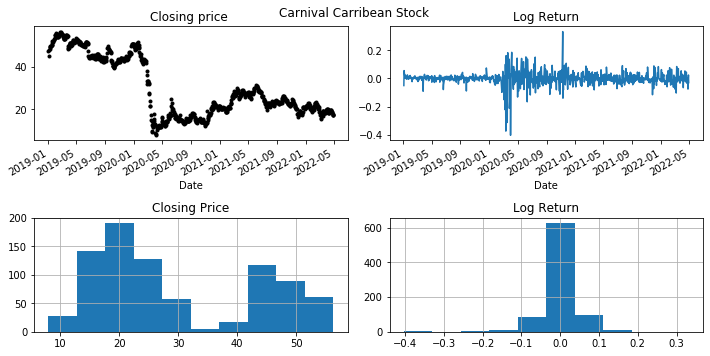

In [12]:
# ccl - Carnival Carribean 
# Line Plot

#  Plot
ccl['log return'] = np.log(ccl["Adj Close"]/ ccl["Adj Close"].shift(1))

fig = plt.figure()

plt.subplot(2, 2, 1)
plt.title("Closing price ")
ccl['Adj Close'].plot(style='k.', figsize=(10, 5))
plt.subplot(2, 2, 2)
plt.title("Log Return")
ccl['log return'].plot(figsize=(10, 5))

#Histogram
plt.subplot(2, 2, 3)
plt.title("Closing Price")
ccl['Adj Close'].hist(figsize=(10, 5))
plt.subplot(2, 2, 4)
plt.title("Log Return")
ccl['log return'].hist(figsize=(10, 5))

fig.suptitle('Carnival Carribean Stock')

plt.tight_layout()


plt.show()




Carnival Carribean has also struggled greatly since the pandemic, as it has seen major declines from the start of our time period. Very similar to its sector counterpart United Airlines.

These two Transportation sector stocks have struggled mightly since the pandemic, ultimately telling that the transportation sector stocks have struggled to perform as long term and short term investments since the pandemic.

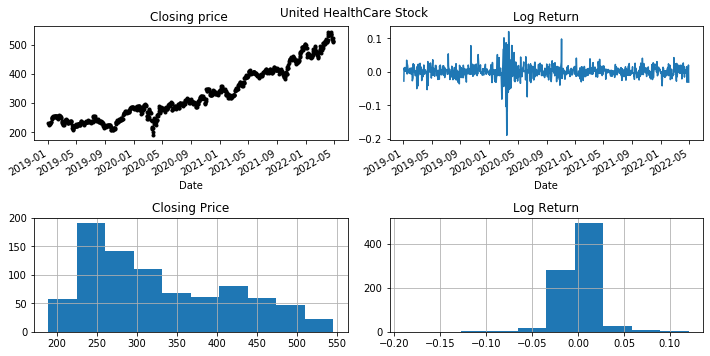

In [13]:
# unh - United HealthCare
# Line Plot
unh['log return'] = np.log(unh["Adj Close"]/ unh["Adj Close"].shift(1))


#  Plot


fig = plt.figure()

plt.subplot(2, 2, 1)
plt.title("Closing price ")
unh['Adj Close'].plot(style='k.', figsize=(10, 5))
plt.subplot(2, 2, 2)
plt.title("Log Return")
unh['log return'].plot(figsize=(10, 5))

#Histogram
plt.subplot(2, 2, 3)
plt.title("Closing Price")
unh['Adj Close'].hist(figsize=(10, 5))
plt.subplot(2, 2, 4)
plt.title("Log Return")
unh['log return'].hist(figsize=(10, 5))

fig.suptitle('United HealthCare Stock')

plt.tight_layout()


plt.show()




United Healthcare has been a great investment since the pandemic. It has grown rapidlly and steadily since the start of the pandemic and has shown to be reliable longterm, as well as short term, if we take a look at the log return histogram. Out of the individual stocks we have looked at, UNH has been one of the stronger equities.

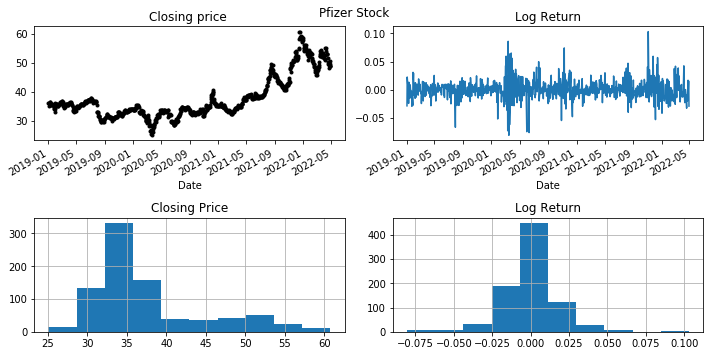

In [14]:
# Pfizer
pfe['log return'] = np.log(pfe["Adj Close"]/ pfe["Adj Close"].shift(1))

# Line Plot

#  Plot

fig = plt.figure()

plt.subplot(2, 2, 1)
plt.title("Closing price ")
pfe['Adj Close'].plot(style='k.', figsize=(10, 5))
plt.subplot(2, 2, 2)
plt.title("Log Return")
pfe['log return'].plot(figsize=(10, 5))

#Histogram
plt.subplot(2, 2, 3)
plt.title("Closing Price")
pfe['Adj Close'].hist(figsize=(10, 5))
plt.subplot(2, 2, 4)
plt.title("Log Return")
pfe['log return'].hist(figsize=(10, 5))

fig.suptitle('Pfizer Stock')

plt.tight_layout()


plt.show()




Pfizer has been a pretty stable stock, but has increased since the start of the pandemic. The stability in its stock prices tells how its a solid investment longterm, but for the shortterm, since it rarely sees much volatility it isn't the best option for a short term investment.

In comparison to unh, pfizer is much more stable in stock price, but United Health Care has been the better investment long term and short term since the pandemic.

As a whole, the healthcare sector has been a solid investment during this time period.

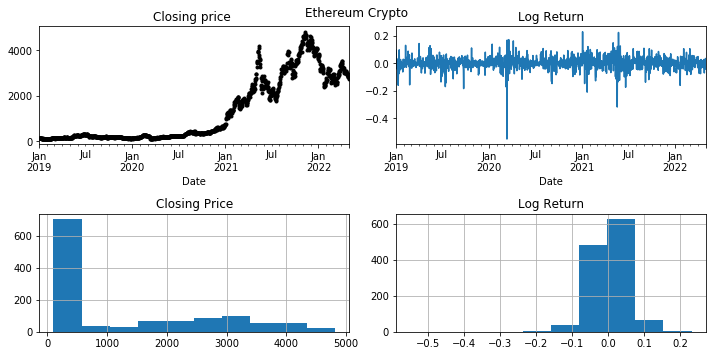

In [15]:
# Ethereum
eth['log return'] = np.log(eth["Adj Close"]/ eth["Adj Close"].shift(1))

# Line Plot

#  Plot

fig = plt.figure()

plt.subplot(2, 2, 1)
plt.title("Closing price ")
eth['Adj Close'].plot(style='k.', figsize=(10, 5))
plt.subplot(2, 2, 2)
plt.title("Log Return")
eth['log return'].plot(figsize=(10, 5))

#Histogram
plt.subplot(2, 2, 3)
plt.title("Closing Price")
eth['Adj Close'].hist(figsize=(10, 5))
plt.subplot(2, 2, 4)
plt.title("Log Return")
eth['log return'].hist(figsize=(10, 5))

plt.tight_layout()

fig.suptitle('Ethereum Crypto')


plt.show()




Looking at the above plots, we can clearly see that Ethereum has been a great investment since the start of the pandemic, looking through a long term lense, it has seen exponential growth since the start of the pandemic, in a short term lense, ethereum isn't a bad short term investment option. The stock price of ethereum has seen substantial change over this time period.

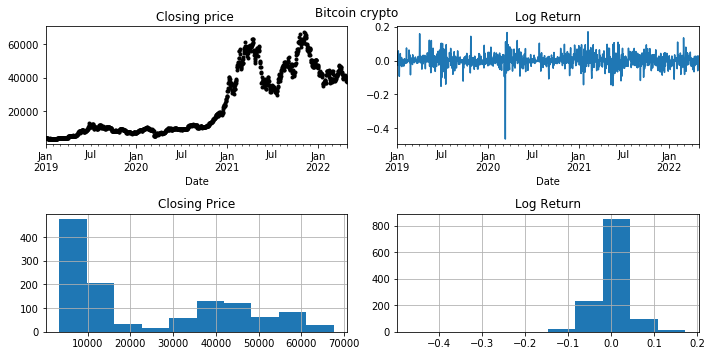

In [16]:
# Bitcoin
btc['log return'] = np.log(btc["Adj Close"]/ btc["Adj Close"].shift(1))

# Line Plot

# Line Plot

#  Plot

fig = plt.figure()

plt.subplot(2, 2, 1)
plt.title("Closing price ")
btc['Adj Close'].plot(style='k.', figsize=(10, 5))
plt.subplot(2, 2, 2)
plt.title("Log Return")
btc['log return'].plot(figsize=(10, 5))

#Histogram
plt.subplot(2, 2, 3)
plt.title("Closing Price")
btc['Adj Close'].hist(figsize=(10, 5))
plt.subplot(2, 2, 4)
plt.title("Log Return")
btc['log return'].hist(figsize=(10, 5))

fig.suptitle('Bitcoin crypto')

plt.tight_layout()


plt.show()




Similar to Ethereum, Bitcoin has also been a great investment since the pandemic, its rapid growth makes it one of the best investments we have seen throughout the pandemic.Its rapid growth of price has led to major stock price movement.

In comparison, Bitcoin and Ethereum have been really great investments since the pandemic. These two cryptocurrencies within the crypto sector have really outperformed the rest of other equities in the markets.




# Now, lets Analyze some of the Indexes/ Market Indicators

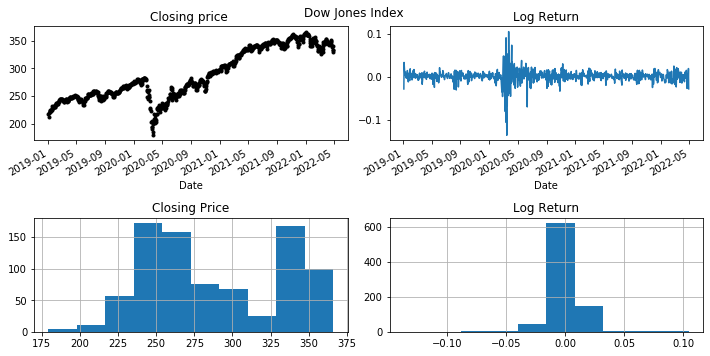

In [17]:
# Dow Jones Index
dia['log return'] = np.log(dia["Adj Close"]/ dia["Adj Close"].shift(1))

# Line Plot


fig = plt.figure()

plt.subplot(2, 2, 1)
plt.title("Closing price ")
dia['Adj Close'].plot(style='k.', figsize=(10, 5))
plt.subplot(2, 2, 2)
plt.title("Log Return")
dia['log return'].plot(figsize=(10, 5))

#Histogram
plt.subplot(2, 2, 3)
plt.title("Closing Price")
dia['Adj Close'].hist(figsize=(10, 5))
plt.subplot(2, 2, 4)
plt.title("Log Return")
dia['log return'].hist(figsize=(10, 5))

fig.suptitle('Dow Jones Index')

plt.tight_layout()


plt.show()




he Dow Jones Industrial Average, Dow Jones, or simply the Dow, is a price-weighted measurement stock market index of 30 prominent companies listed on stock exchanges in the United States.

As we see from the plots above, the 30 most promitie companies have increased in stock price since the beginning of the pandemic initially saw a decline, but was able to recover and have been doing very well.

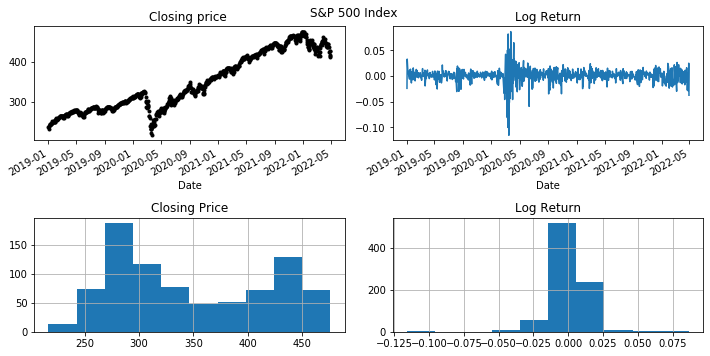

In [18]:
# SPY Index
spy['log return'] = np.log(spy["Adj Close"]/ spy["Adj Close"].shift(1))

# Line Plot


fig = plt.figure()

plt.subplot(2, 2, 1)
plt.title("Closing price ")
spy['Adj Close'].plot(style='k.', figsize=(10, 5))
plt.subplot(2, 2, 2)
plt.title("Log Return")
spy['log return'].plot(figsize=(10, 5))

#Histogram
plt.subplot(2, 2, 3)
plt.title("Closing Price")
spy['Adj Close'].hist(figsize=(10, 5))
plt.subplot(2, 2, 4)
plt.title("Log Return")
spy['log return'].hist(figsize=(10, 5))

fig.suptitle('S&P 500 Index')

plt.tight_layout()


plt.show()




The Standard and Poor's 500, or simply the S&P 500, is a stock market index tracking the performance of 500 large companies listed on stock exchanges in the United States.


The S&P 500, similar to the Dow Jones Index, saw an initial drop near the beginning of the pandemic, but was able to recover since then and prove that their is strength still within the market.

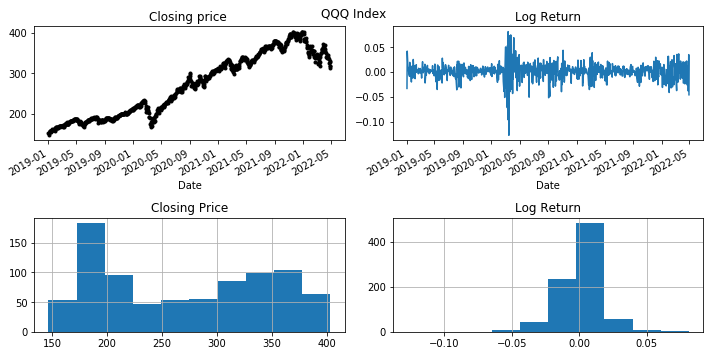

In [19]:
# QQQ Index

qqq['log return'] = np.log(qqq["Adj Close"]/ qqq["Adj Close"].shift(1))

# Line Plot

#  Plot

fig = plt.figure()

plt.subplot(2, 2, 1)
plt.title("Closing price ")
qqq['Adj Close'].plot(style='k.', figsize=(10, 5))
plt.subplot(2, 2, 2)
plt.title("Log Return")
qqq['log return'].plot(figsize=(10, 5))

#Histogram
plt.subplot(2, 2, 3)
plt.title("Closing Price")
qqq['Adj Close'].hist(figsize=(10, 5))
plt.subplot(2, 2, 4)
plt.title("Log Return")
qqq['log return'].hist(figsize=(10, 5))

fig.suptitle('QQQ Index')

plt.tight_layout()


plt.show()




Invesco QQQ is an exchange-traded fund (ETF) that tracks the Nasdaq-100 Index™. The Index includes the 100 largest non-financial companies listed on the Nasdaq based on market cap.

The Invesco QQQ has moved simialarly to the S&P 500, as it experienced an initial drop near the beginning of the pandemic, but recovered greatly.

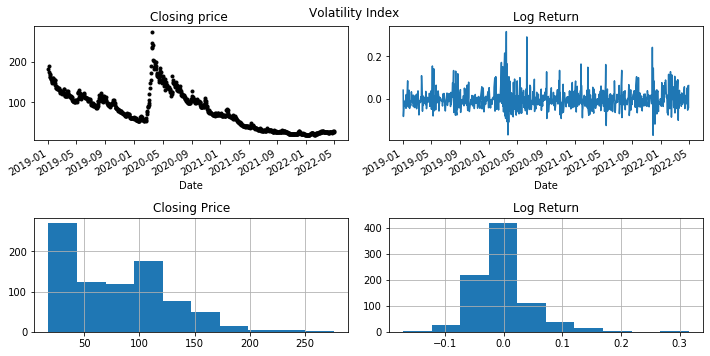

In [20]:
# Volatility Index 
vxx['log return'] = np.log(vxx["Adj Close"]/ vxx["Adj Close"].shift(1))

# Line Plot

#  Plot

fig = plt.figure()

plt.subplot(2, 2, 1)
plt.title("Closing price ")
vxx['Adj Close'].plot(style='k.', figsize=(10, 5))
plt.subplot(2, 2, 2)
plt.title("Log Return")
vxx['log return'].plot(figsize=(10, 5))

#Histogram
plt.subplot(2, 2, 3)
plt.title("Closing Price")
vxx['Adj Close'].hist(figsize=(10, 5))
plt.subplot(2, 2, 4)
plt.title("Log Return")
vxx['log return'].hist(figsize=(10, 5))

fig.suptitle('Volatility Index')

plt.tight_layout()


plt.show()

The Volatility Index helps highlight the overall volatility in the market, we see that near may 2020, the market volatility shot up drastically, as most stocks experienced a sharp decline in stock price, but since then, the market volatility has steadily declined.

# Now, lets see normalize our findings

We will do this by focusing on the percentage gains of the equities and their sectors

In [21]:
newDF = covid_close_df.transpose().dropna()
newDF = newDF.transpose()


In [22]:
first_column = newDF.iloc[:, 0]
last_column = newDF.iloc[:,-1]
last_column

Bitcoin                 53555.109375
Ethereum                 2756.876953
Apple                     132.496674
Amazon                   3471.310059
United Airlines            53.689999
Carnival Cruise Line       27.209999
Pfizer                     37.267315
United Healthcare         396.216614
Wells Fargo                45.310448
Bank of America            40.336639
VXX                        38.570000
Dow Jones                 334.841827
NASDAQ                    338.597870
SPY                       414.603973
Name: 2021-04-29 00:00:00, dtype: float64

In [23]:
Totalgains = ((last_column - first_column)/ first_column) * 100
Totalgains


Bitcoin                 1227.166687
Ethereum                1728.129968
Apple                    257.079934
Amazon                   109.188148
United Airlines          -35.900194
Carnival Cruise Line     -44.861858
Pfizer                     2.437436
United Healthcare         70.963507
Wells Fargo                4.996821
Bank of America           68.428987
VXX                      -76.493175
Dow Jones                 49.647540
NASDAQ                   114.781953
SPY                       69.568272
dtype: float64

Text(0.5, 0, 'Stocks')

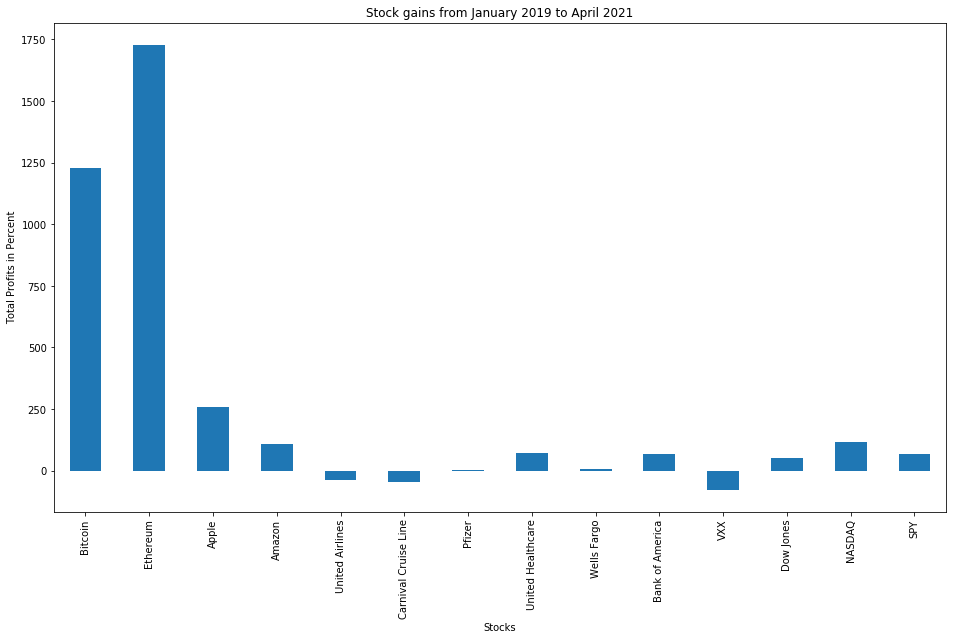

In [24]:
ax = Totalgains.plot.bar(title = "Stock gains from January 2019 to April 2021", legend = False, figsize = (16,9))
ax.set_ylabel('Total Profits in Percent')
ax.set_xlabel('Stocks')

Looking at the individual percentage gains of equities, we can see that the crypto markets did extremely well during this time

In [25]:
pre_covid_sectors_profits_df = pd.DataFrame()


dict1 = {'Tech Sector':[(Totalgains['Apple'] + Totalgains['Amazon']) / 2],
        'Crypto Sector':[(Totalgains['Bitcoin'] + Totalgains['Ethereum']) / 2],
        'Transportation Sector':[(Totalgains['United Airlines'] + Totalgains['Carnival Cruise Line']) / 2],
        'Bank Sector': [(Totalgains['Wells Fargo'] + Totalgains['Bank of America']) / 2],
        'Healthcare Sector': [(Totalgains['Pfizer'] + Totalgains['United Healthcare']) / 2]}

df = pd.DataFrame(dict1)

#pre_covid_sectors_profits_df['Tech Sector'] = (Totalgains['Apple'] + Totalgains['Amazon']) / 2
#pre_covid_sectors_profits_df['Crypto Sector'] = (Totalgains['Bitcoin'] + Totalgains['Ethereum']) / 2
#pre_covid_sectors_profits_df['Transportation Sector'] = (Totalgains['United Airlines'] + Totalgains['Carnival Cruise Line']) / 2
#pre_covid_sectors_profits_df['Bank Sector'] = (Totalgains['Wells Fargo'] + Totalgains['Bank of America']) / 2
#pre_covid_sectors_profits_df['Healthcare Sector'] = (Totalgains['Pfizer'] + Totalgains['United Healthcare']) / 2

pre_covid_sectors_profits_df

""


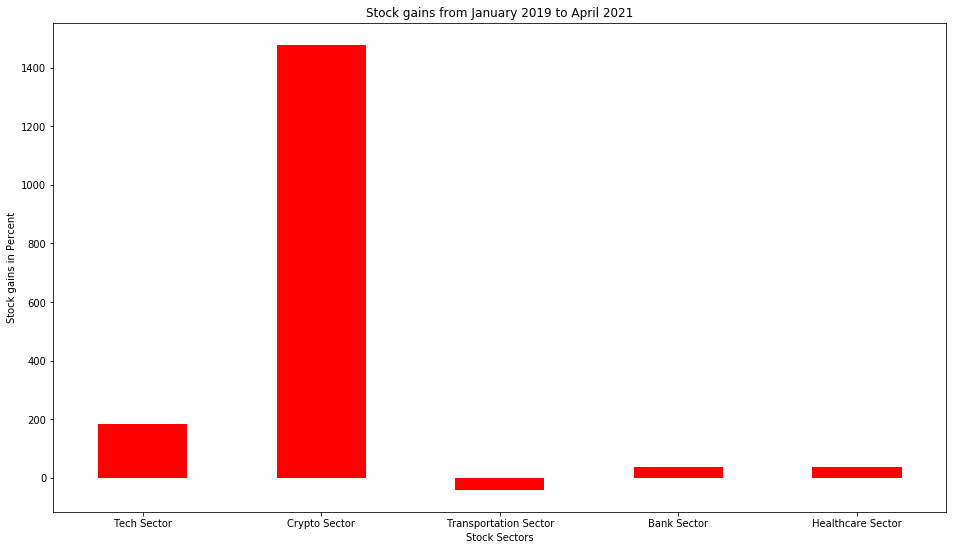

In [26]:
ax = df.transpose().plot.bar(color=["Red"], rot=0, title="Stock gains from January 2019 to April 2021", figsize=(16,9),legend=False)
ax.set_xlabel("Stock Sectors")
ax.set_ylabel("Stock gains in Percent")
plt.show()

To make sure that the sectors were being affected by COVID-19, we noted down dates from the article linked at the top. We then had arrows representing each newsline and color coded them so the green arrows representing news headlines on dates that were positively impacting society and red arrows representing the headlines on dates that had negative connotations. Each sector is graphed next to each other.


| Index as Shown on Chart | Good News Days:     | Description:                             |
|---| ------------------- | ---------------------------------------- |
| 7 | March 26th, 2020    | Senate Passes CARES Act                  |
| 8 | March 27th, 2020    | Trump Signs CARES Act Into Law           |
| 10 | March 30th, 2020    | FDA Authorizes Use of Hydroxychloroquine |
| 11 | May 21th, 2020      | U.S. and AstraZeneca Form Vaccine Deal   |
| 13 | July 7th, 2020      | US Surpasses 3 Million Infections, Begins WHO Withdrawal|
| 14 | July 27th, 2020     | Moderna Vaccine Begins Phase 3 Trial, Receives $472M From Trump Administration |
| 15 | August 11th, 2020   | Trump Administration Reaches Deal With Moderna |
| 18 | December 11th, 2020 | FDA Agrees to EUA for COVID-19 Vaccine From Pfizer, BioNTech |
| 19 | December 18th, 2020 | FDA Signs Off on EUA for Moderna's COVID-19 Vaccine |
| 20 | December 28th, 2020 | Day after Second Stimulus Check passes              |

| Index as Shown on Chart | Bad News Days:     | Description:                             |
|---| ------------------ | ---------------------------------------- |
| 1 | January 21st, 2020 | CDC Confirms First US Coronavirus Case   |
| 2 | January 31st, 2020 | WHO Issues Global Health Emergency       |
| 3 | February 3rd, 2020 | US Declares Public Health Emergency      |
| 4 | February 25th, 2020 | CDC Says COVID-19 Is Heading Toward Pandemic Status |
| 5 | March 11th, 2020 | WHO Declares COVID-19 a Pandemic |
| 6 | March 13th, 2020 | Trump Declares COVID-19 a National Emergency / Travel Ban into Europe |
| 9 | May 28th, 2020 | US COVID-19 Deaths Pass the 100,000 Mark |
| 11 | June 10th, 2020 | US COVID-19 Cases Reach 2 Million | 
| 12 | June 30th, 2020 | Fauci Warns New COVID-19 Cases Could Hit 100,000 a Day |
| 16 | September 28th, 2020 | Global COVID-19 Deaths Surpass 1 Million |
| 17 | October 28th, 2020 | Trump, First Lady Test Positive for COVID-19; Trump Enters Hospital |


<Figure size 432x288 with 0 Axes>

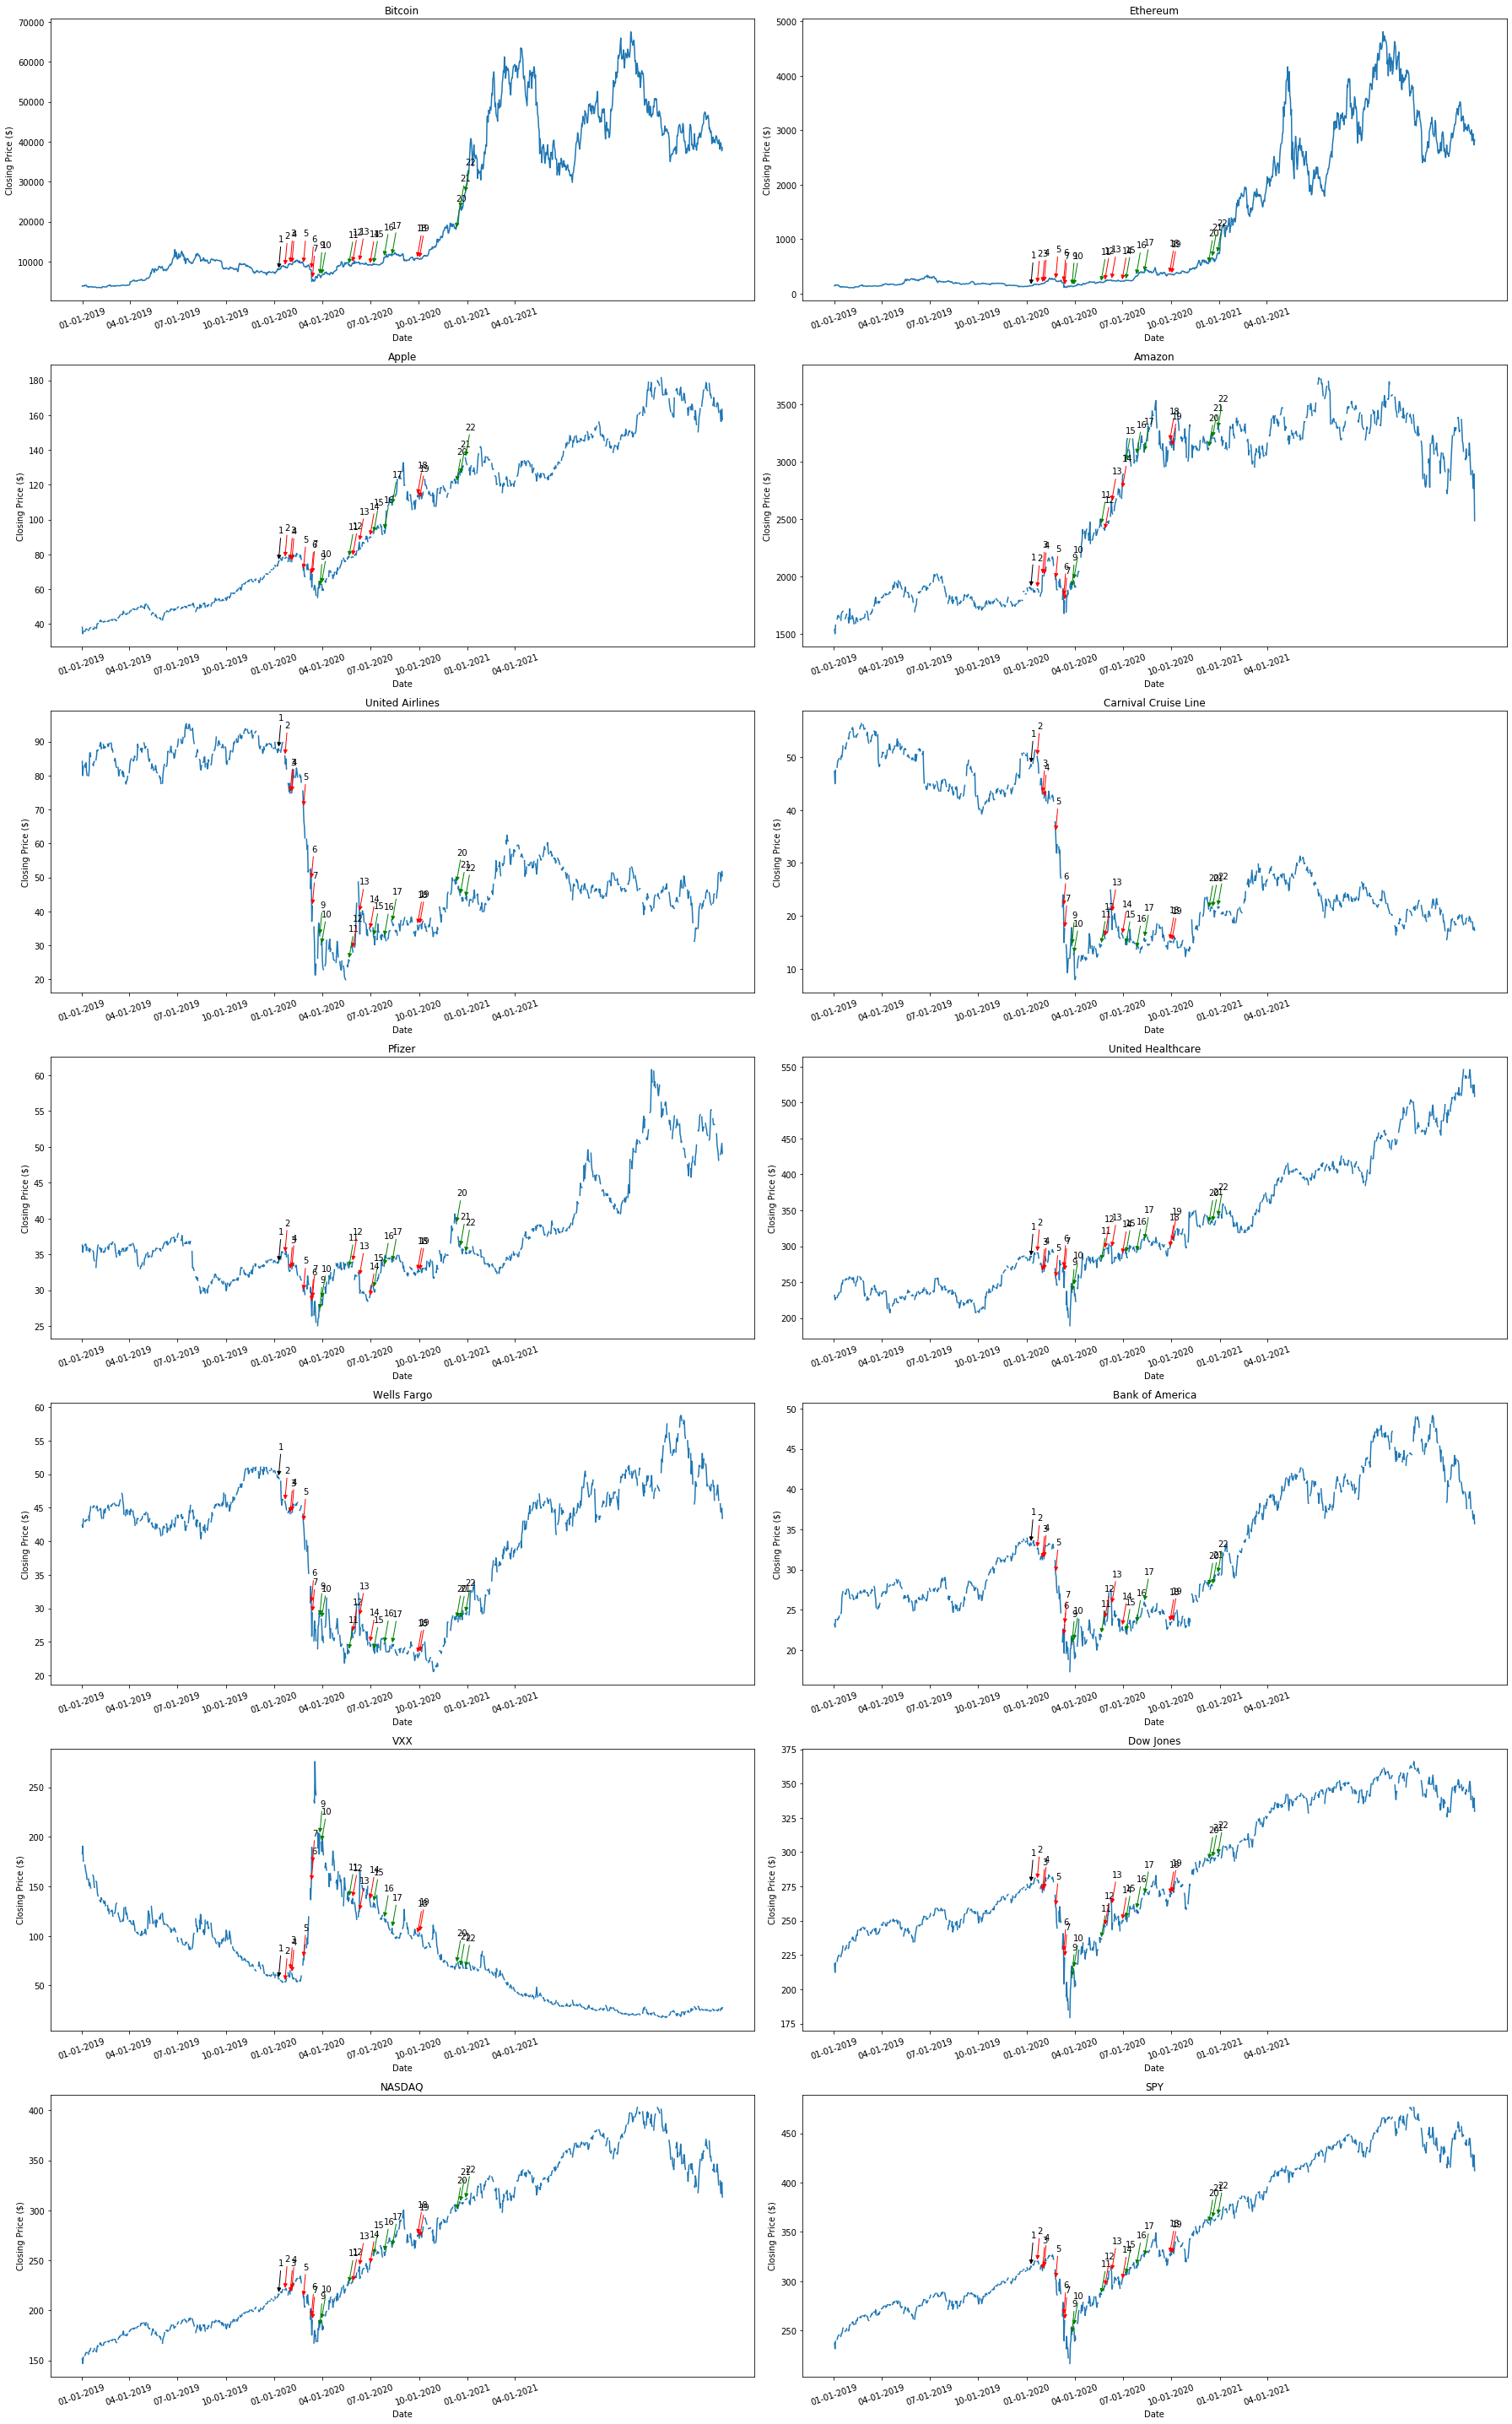

In [27]:
start = (close.columns.get_loc('2020-01-09'),1)

Gdates = [(close.columns.get_loc('2020-03-26'),8),(close.columns.get_loc('2020-03-27'),9),
          (close.columns.get_loc('2020-03-30'),10),(close.columns.get_loc('2020-05-21'),11),
          (close.columns.get_loc('2020-07-07'),15),(close.columns.get_loc('2020-07-27'),16),
          (close.columns.get_loc('2020-08-11'),17),(close.columns.get_loc('2020-12-11'),20),
          (close.columns.get_loc('2020-12-18'),21),(close.columns.get_loc('2020-12-28'),22)]

Bdates = [(close.columns.get_loc('2020-01-21'),2),(close.columns.get_loc('2020-01-31'),3),
          (close.columns.get_loc('2020-02-03'),4),(close.columns.get_loc('2020-02-25'),5),
          (close.columns.get_loc('2020-03-11'),6),(close.columns.get_loc('2020-03-13'),7),
          (close.columns.get_loc('2020-05-28'),12),(close.columns.get_loc('2020-06-10'),13),
          (close.columns.get_loc('2020-06-30'),14),(close.columns.get_loc('2020-09-28'),18),
          (close.columns.get_loc('2020-10-02'),19)]

fig1 = plt.figure()
fig, ax = plt.subplots(int(close.shape[0]/2),2,figsize=(25,40))

for i in range(close.shape[0]):

    ax[int(i/2)][int(i%2)].plot(range(close.shape[1]),close.iloc[i].values)

    bounds = ax[int(i/2)][int(i%2)].get_ybound()
    arrow_height = (bounds[1] - bounds[0]) * 0.1
    
    ax[int(i/2)][int(i%2)].annotate(str(start[1]),xy=(start[0],close.iloc[i,start[0]]),xytext=(start[0],close.iloc[i,start[0]]+arrow_height),
                                    arrowprops=dict(arrowstyle='-|>',color='black'))
    for g in Gdates[1:]:
        ax[int(i/2)][int(i%2)].annotate(str(g[1]),xy=(g[0],close.iloc[i,g[0]]),xytext=(g[0],close.iloc[i,g[0]]+arrow_height),
                    arrowprops=dict(arrowstyle='-|>',color='green'))
    for b in Bdates:
        ax[int(i/2)][int(i%2)].annotate(str(b[1]),xy=(b[0],close.iloc[i,b[0]]),xytext=(b[0],close.iloc[i,b[0]]+arrow_height),
                    arrowprops=dict(arrowstyle='-|>',color='red'))

    ax[int(i/2)][int(i%2)].set_title(close.index[i])
    ax[int(i/2)][int(i%2)].set_xlabel('Date')
    ax[int(i/2)][int(i%2)].set_ylabel('Closing Price ($)')
    ax[int(i/2)][int(i%2)].set_xticks([close.columns.get_loc('2019-01-01'),close.columns.get_loc('2019-04-01'),
                                      close.columns.get_loc('2019-07-01'),close.columns.get_loc('2019-10-01'),
                                      close.columns.get_loc('2020-01-01'),close.columns.get_loc('2020-04-01'),
                                      close.columns.get_loc('2020-07-01'),close.columns.get_loc('2020-10-01'),
                                      close.columns.get_loc('2021-01-01'),close.columns.get_loc('2021-04-01')])
    ax[int(i/2)][int(i%2)].set_xticklabels(['01-01-2019','04-01-2019','07-01-2019','10-01-2019',
                                            '01-01-2020','04-01-2020','07-01-2020','10-01-2020',
                                            '01-01-2021','04-01-2021'],rotation=19)
plt.tight_layout()
    
    
    
    
    
    

As shown, each red arrow is followed by a dip and every green arrow is followed by a rise in stock price. Also another interesting thing to notice is how the companies in each sector move almost exactly alike. Another way to prove that sector stock price moved due to COVID-19 is to check if volume moved whenever these COVID-19 related newslines came out.  

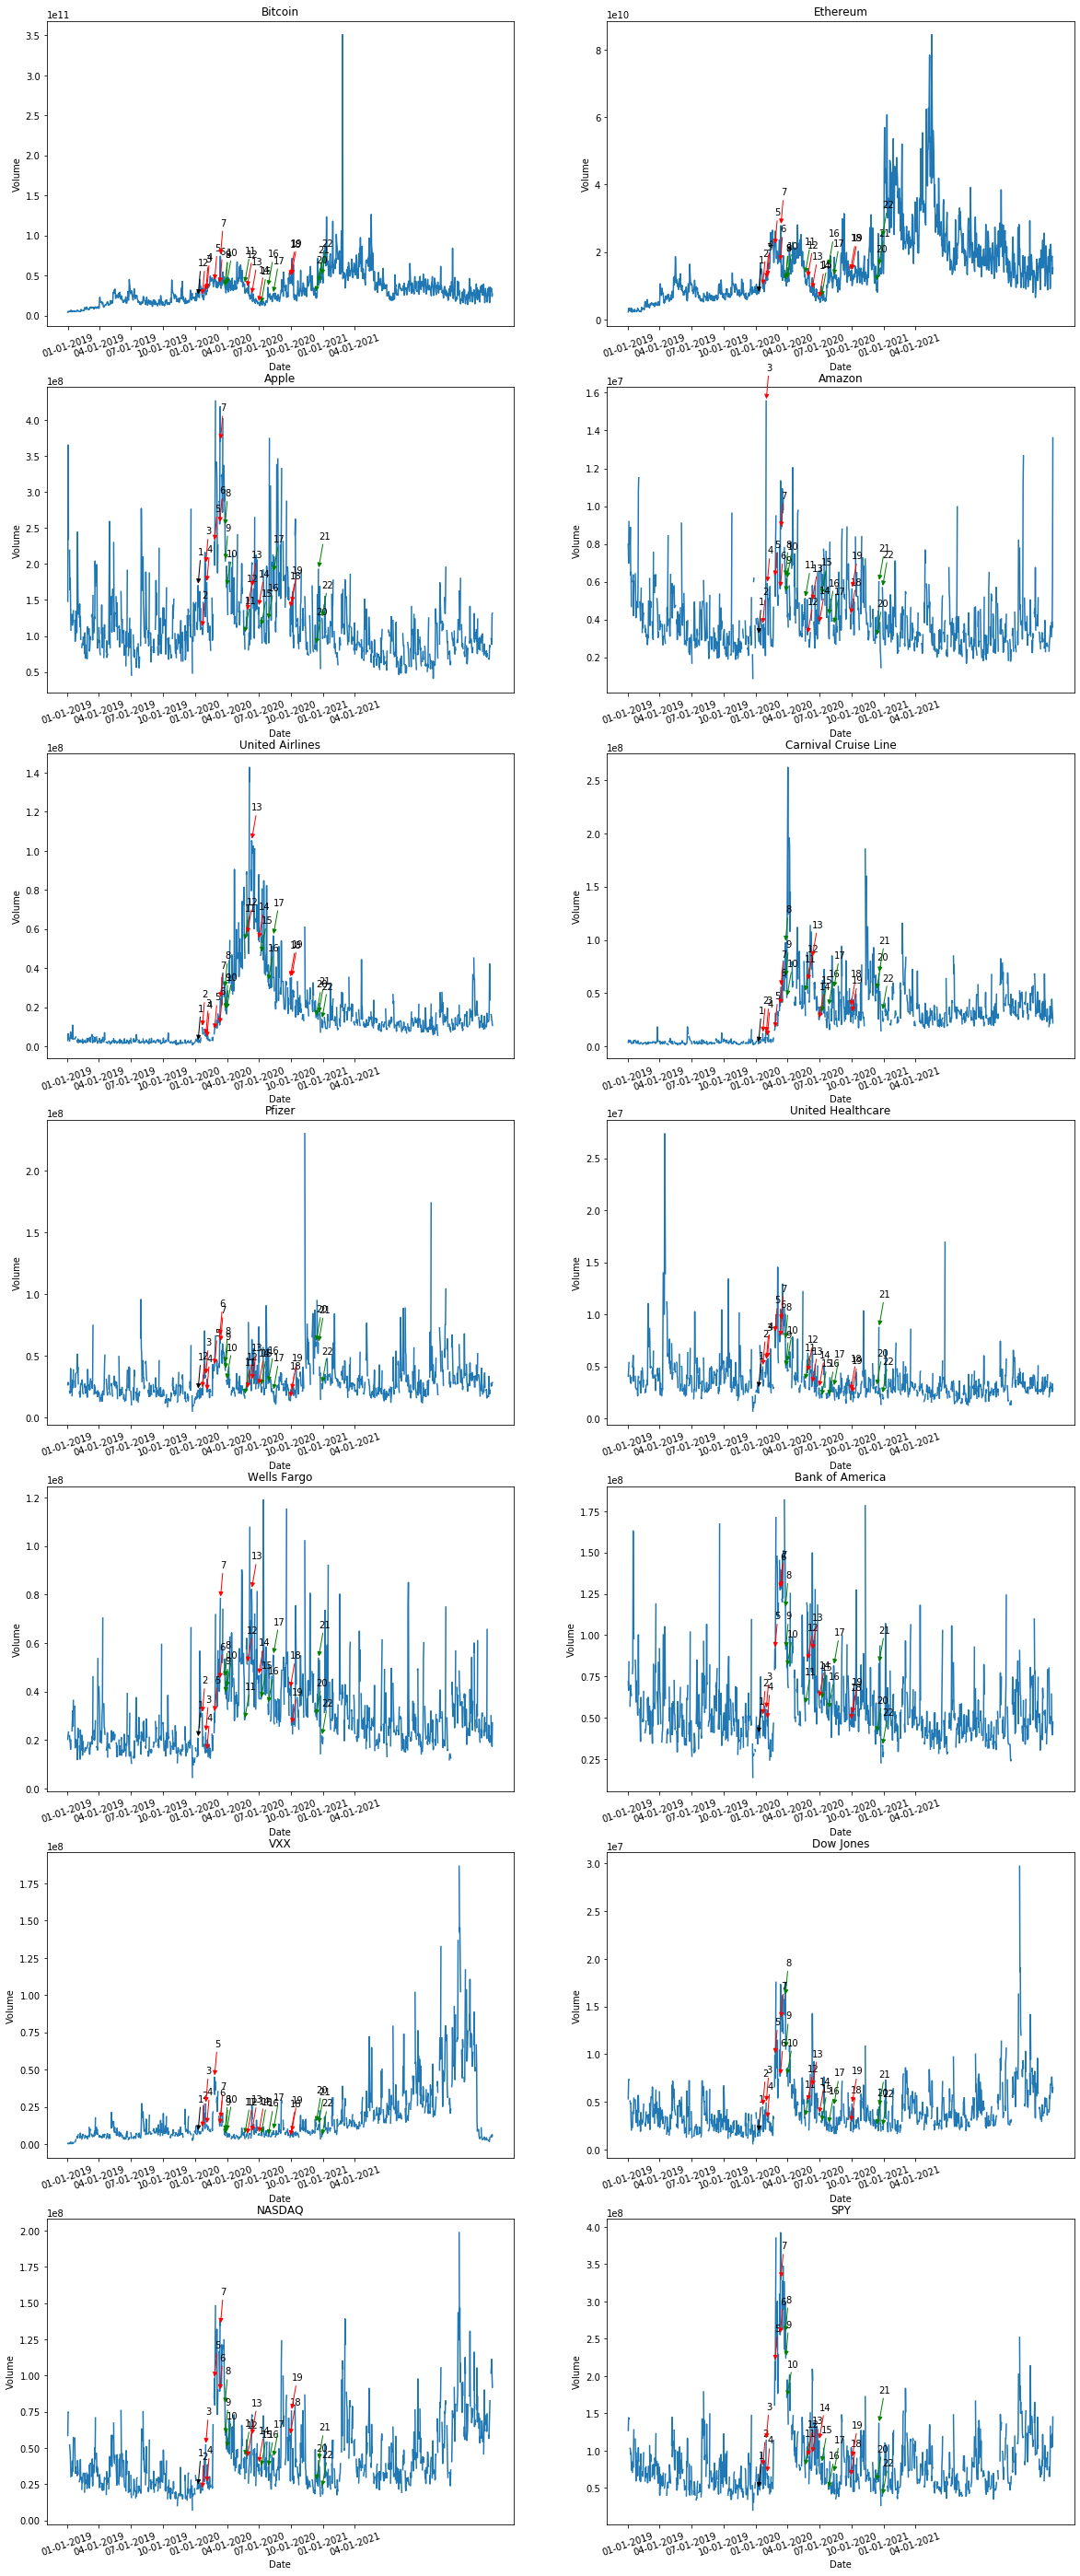

In [28]:
fig, ax = plt.subplots(int(vol.shape[0]/2),2,figsize=(20,50))
for i in range(vol.shape[0]):

    ax[int(i/2)][int(i%2)].plot(range(vol.shape[1]),vol.iloc[i].values)

    bounds = ax[int(i/2)][int(i%2)].get_ybound()
    arrow_height = (bounds[1] - bounds[0]) * 0.1

    ax[int(i/2)][int(i%2)].annotate(str(start[1]),xy=(start[0],vol.iloc[i,start[0]]),xytext=(start[0],vol.iloc[i,start[0]]+arrow_height),
                    arrowprops=dict(arrowstyle='-|>',color='black'))
    for g in Gdates:
        ax[int(i/2)][int(i%2)].annotate(str(g[1]),xy=(g[0],vol.iloc[i,g[0]]),xytext=(g[0],vol.iloc[i,g[0]]+arrow_height),
                    arrowprops=dict(arrowstyle='-|>',color='green'))
    for b in Bdates:
        ax[int(i/2)][int(i%2)].annotate(str(b[1]),xy=(b[0],vol.iloc[i,b[0]]),xytext=(b[0],vol.iloc[i,b[0]]+arrow_height),
                    arrowprops=dict(arrowstyle='-|>',color='red'))

    ax[int(i/2)][int(i%2)].set_title(vol.index[i])
    ax[int(i/2)][int(i%2)].set_xlabel('Date')
    ax[int(i/2)][int(i%2)].set_ylabel('Volume')
    ax[int(i/2)][int(i%2)].set_xticks([close.columns.get_loc('2019-01-01'),close.columns.get_loc('2019-04-01'),
                                      close.columns.get_loc('2019-07-01'),close.columns.get_loc('2019-10-01'),
                                      close.columns.get_loc('2020-01-01'),close.columns.get_loc('2020-04-01'),
                                      close.columns.get_loc('2020-07-01'),close.columns.get_loc('2020-10-01'),
                                      close.columns.get_loc('2021-01-01'),close.columns.get_loc('2021-04-01')])
    ax[int(i/2)][int(i%2)].set_xticklabels(['01-01-2019','04-01-2019','07-01-2019','10-01-2019',
                                            '01-01-2020','04-01-2020','07-01-2020','10-01-2020',
                                            '01-01-2021','04-01-2021'],rotation=19)

As you can see, every time there was a movement in stock volume, there was a news event relating to COVID. Because of this we can assume some correlation between stock price moving per company and the pandemic affecting it. There were percentage gains every time there was a positive newsline about COVID-19 and we can see the volume also reflects the increase in buying. Everytime that there was a negative newsline about COVID-19, there was also a dip in most sectors and there was an increase in volume which signals a sell-off in that sector/company.

# Now lets Summarize our findings so far


Overall, through my analysis of the effect of COVID-19 on stock market and crypto market we can see that had a direct effect on both. The analysis normalized the change in data for the events. We can see the effect of Covid on the market through multiple events that occurred throughout the year. We also see the recovery rate of the markets towards the end of COVID.

We also must consider that the Crypto market has not reached it’s full potential. With such a volatile market, we can see still see effects of a global pandemic on such deregulated currency.

This shows us the impact of a global pandemic of this size. With trillions of dollars being lost in the market everyday we can prepare for something like this in the future. Due to such a unique time in our lives, times like these are hard to prepare for, but have shown that there comes a lot of economic opportunity . With not all the markets completely recovered, such as transportation, we can tell the public the risk and full effect of a pandemic.



# Time to create a Forecasting model

Using the analysis information I found, for this part of the project I only want to look at Cryptocurrency and Tech related equitites, as they have shown the most strength out of the other sectors. So we will be looking at Bitcoin, Ethereum, Amazon, and Apple. We will use ARIMA

# Bitcoin

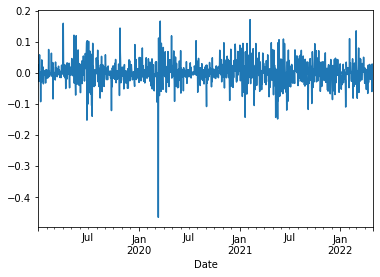

In [29]:
btc = btc.dropna()
btc['log return'].plot()


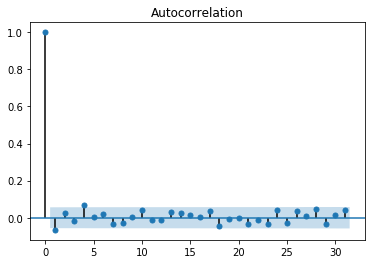

In [30]:
plot_acf(btc['log return']);

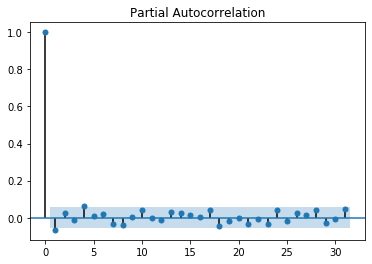

In [55]:
plot_pacf(btc['log return']);

In [31]:
train_size = int(len(btc) *.9)
train, test = list(btc[1:train_size]['log return']), list(btc[train_size:]['log return'])

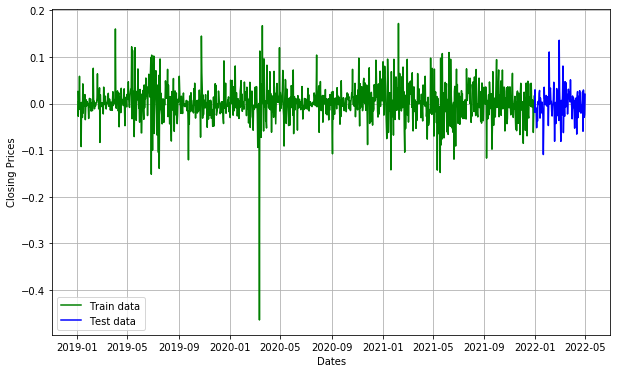

In [32]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(btc[0:train_size]['log return'], color='green',label='Train data')
plt.plot(btc[train_size:]['log return'], color='blue',label='Test data')
plt.legend()

In [57]:
model_predictions = []
n_test_obser = len(test)

for i in range(n_test_obser):
    model = ARIMA(train, order=(4,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = list(output[0])[0]
    model_predictions.append(yhat)
    actual_test_value = test[i]
    train.append(actual_test_value)
    

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be r

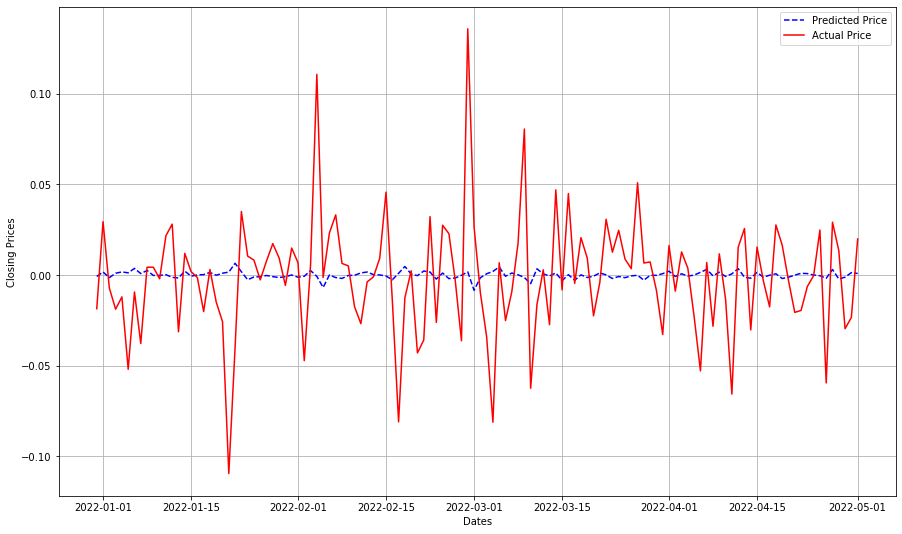

In [56]:
date_range = btc[train_size:].index

plt.figure(figsize=(15,9))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(date_range, model_predictions, color='blue', linestyle = 'dashed',   label= 'Predicted Price')
plt.plot(date_range, test, color='red',   label= 'Actual Price')    
plt.legend()

An increasing mean and the std tells us that our data might not be stationary

# Ethereum

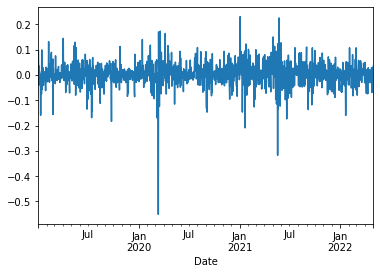

In [35]:
eth = eth.dropna()
eth['log return'].plot()

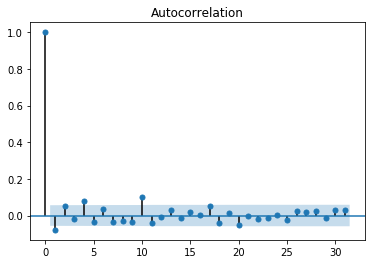

In [36]:
plot_acf(eth['log return']);

In [ ]:
plot_pacf(eth['log return']);

In [37]:
train_size1 = int(len(eth) *.9)
train1, test1 = list(eth.iloc[1:train_size1]['log return']), list(eth.iloc[train_size1:]['log return'])

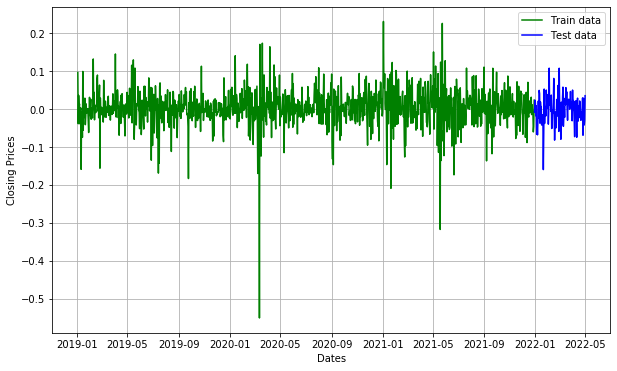

In [38]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(eth[0:train_size1]['log return'], color='green',label='Train data')
plt.plot(eth[train_size1:]['log return'], color='blue',label='Test data')
plt.legend()

In [39]:
model_predictions1 = []
n_test_obser1 = len(test1)

for i in range(n_test_obser1):
    model1 = ARIMA(train1, order=(4,1,1))
    model_fit1 = model1.fit()
    output1 = model_fit1.forecast()
    yhat1 = list(output1[0])[0]
    model_predictions1.append(yhat1)
    actual_test_value1 = test1[i]
    train1.append(actual_test_value1)
    

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be r

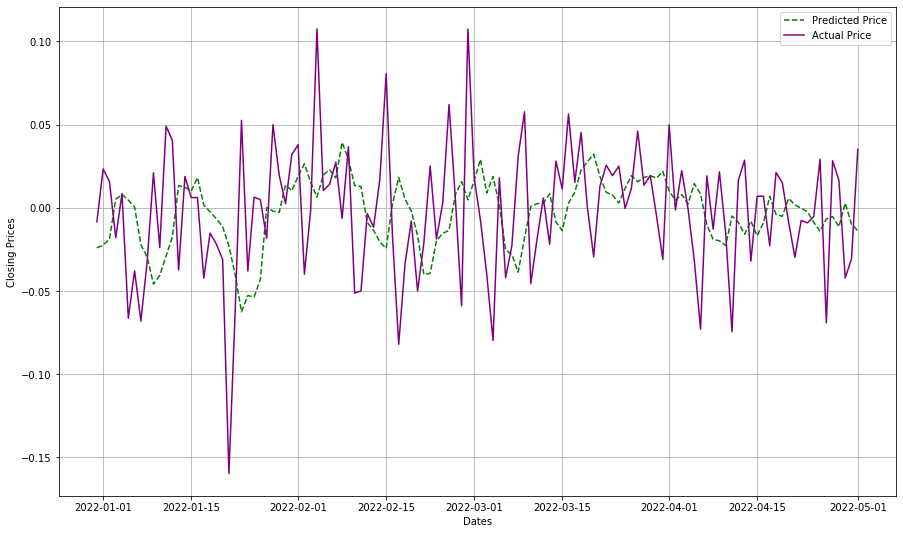

In [58]:
date_range1 = eth[train_size1:].index

plt.figure(figsize=(15,9))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(date_range1, model_predictions1, color='green', linestyle = 'dashed',   label= 'Predicted Price')
plt.plot(date_range1, test1, color='purple',   label= 'Actual Price')    
plt.legend()

# Apple

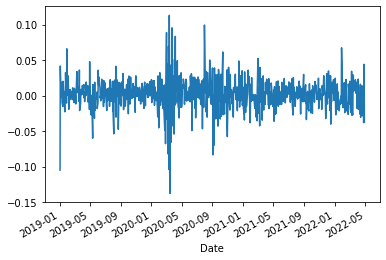

In [41]:
aapl = aapl.dropna()
aapl['log return'].plot()

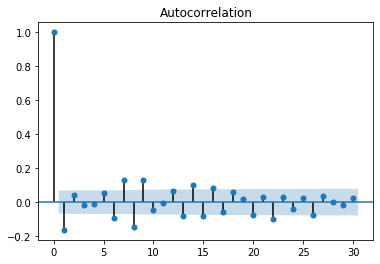

In [42]:
plot_acf(aapl['log return']);

In [ ]:
plot_pacf(aapl['log return']);

In [43]:
train_size2 = int(len(aapl) *.9)
train2, test2 = list(aapl.iloc[1:train_size2]['log return']), list(aapl.iloc[train_size2:]['log return'])

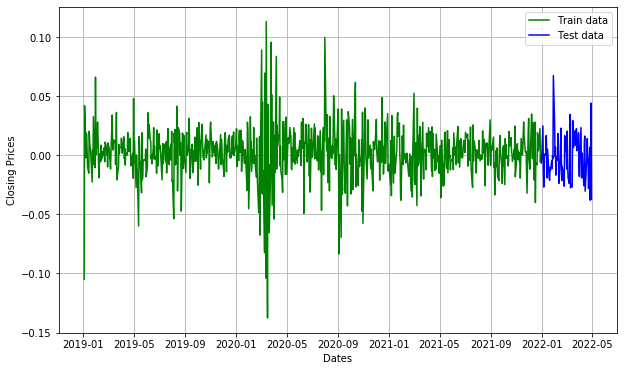

In [44]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(aapl[0:train_size2]['log return'], color='green',label='Train data')
plt.plot(aapl[train_size2:]['log return'], color='blue',label='Test data')
plt.legend()

In [45]:
model_predictions2 = []
n_test_obser2 = len(test2)

for i in range(n_test_obser2):
    model2 = ARIMA(train2, order=(4,1,0))
    model_fit2 = model2.fit()
    output2 = model_fit2.forecast()
    yhat2 = list(output2[0])[0]
    model_predictions2.append(yhat2)
    actual_test_value2 = test2[i]
    train2.append(actual_test_value2)
    

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be r

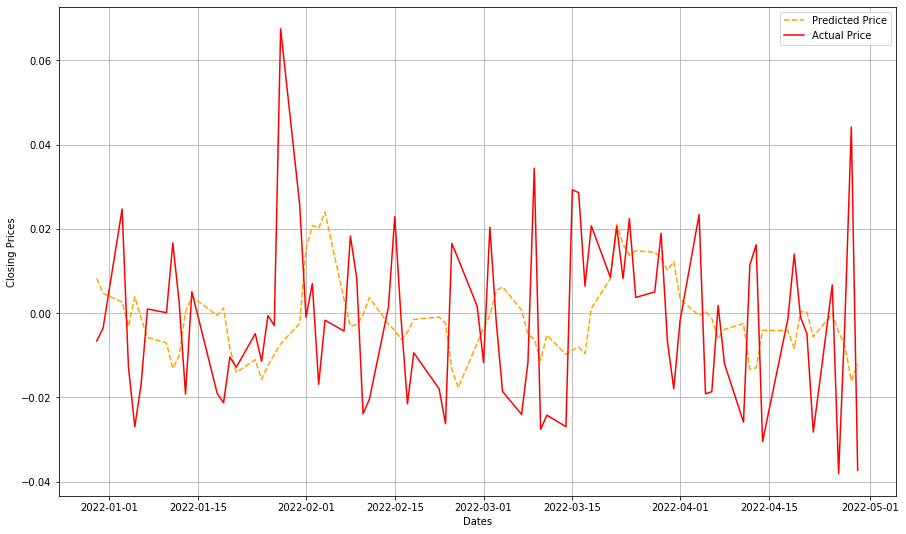

In [46]:
date_range2 = aapl[train_size2:].index

plt.figure(figsize=(15,9))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(date_range2, model_predictions2, color='orange', linestyle = 'dashed',   label= 'Predicted Price')
plt.plot(date_range2, test2, color='red',   label= 'Actual Price')    
plt.legend()

# Amazon

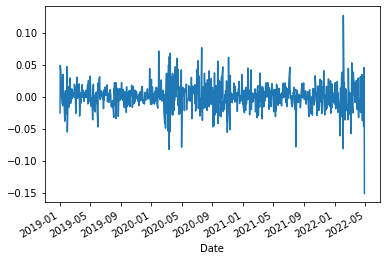

In [47]:
amzn = amzn.dropna()
amzn['log return'].plot()

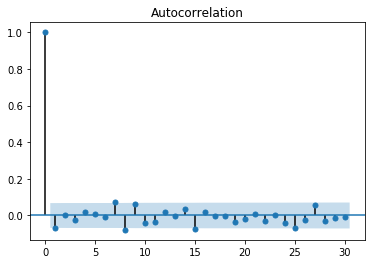

In [48]:
plot_acf(amzn['log return']);

In [ ]:
plot_acf(amzn['log return']);

In [49]:
train_size3 = int(len(amzn) *.9)
train3, test3 = list(amzn.iloc[1:train_size2]['log return']), list(amzn.iloc[train_size2:]['log return'])

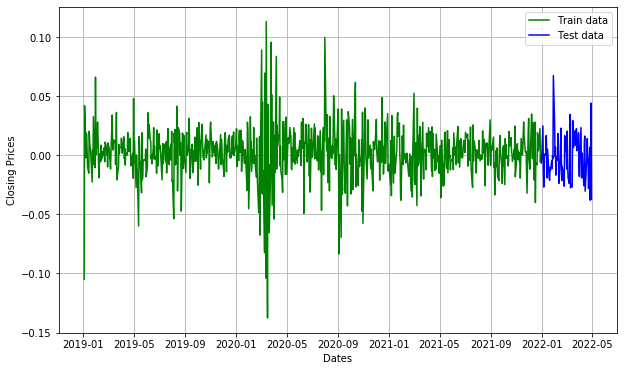

In [50]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(aapl[0:train_size3]['log return'], color='green',label='Train data')
plt.plot(aapl[train_size3:]['log return'], color='blue',label='Test data')
plt.legend()

In [51]:
model_predictions3 = []
n_test_obser3 = len(test3)

for i in range(n_test_obser3):
    model3 = ARIMA(train3, order=(4,1,0))
    model_fit3 = model3.fit()
    output3 = model_fit3.forecast()
    yhat3 = list(output3[0])[0]
    model_predictions3.append(yhat3)
    actual_test_value3 = test3[i]
    train3.append(actual_test_value3)
    

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be r

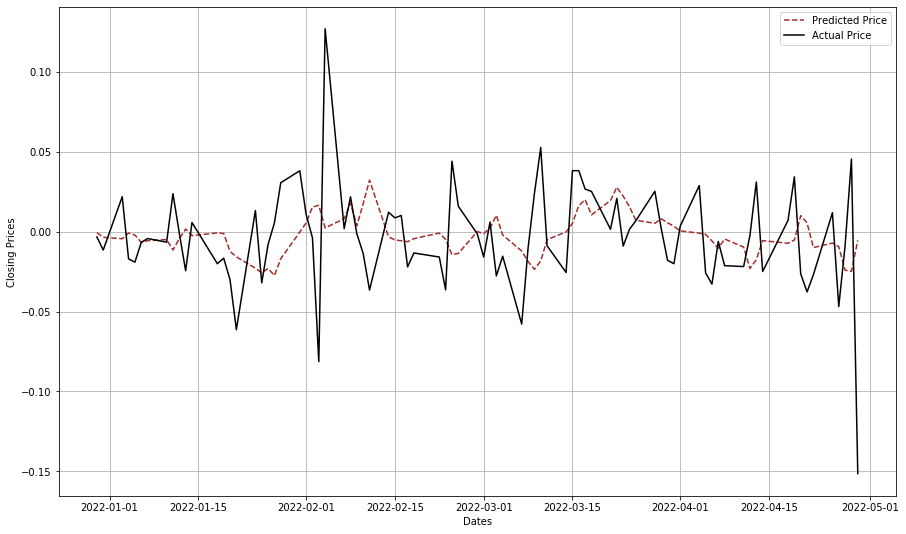

In [52]:
date_range3 = amzn[train_size3:].index

plt.figure(figsize=(15,9))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(date_range3, model_predictions3, color='brown', linestyle = 'dashed',   label= 'Predicted Price')
plt.plot(date_range3, test3, color='black',   label= 'Actual Price')    
plt.legend()

# Conclusion

Looking at our forcasting model, ARMA model, where the Autoregressive integrated moving average (ARIMA) models predict future values based on past values. ARIMA makes use of lagged moving averages to smooth time series data. They are widely used in technical analysis to forecast future security prices. Looking at how the various model in compared to the actual output from the given stocks. 

Our model is used to predict log returns of the given stock and given the results, with more testing our model can be even better.